In [1]:
# import all libs

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
%load_ext tensorboard

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['dataset-of-10s.csv']))

df = pd.read_csv('spotify_hit_predicter_dataset/dataset-of-10s.csv')

In [5]:
df.head(820)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.780,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Angel Eyes,Love And Theft,spotify:track:63w0QA1wiV7QhF9jeiHETF,0.656,0.696,8,-5.917,1,0.0261,0.01340,0.000000,0.0753,0.966,108.015,186627,4,51.35629,9,1
816,Black Beatles,Rae Sremmurd Featuring Gucci Mane,spotify:track:6fujklziTHa8uoM5OQSfIo,0.794,0.632,0,-6.163,1,0.0649,0.14200,0.000000,0.1280,0.355,145.926,291893,4,27.31067,11,1
817,Tus Jefes No Me Quieren,Grupo Ensamble,spotify:track:16OHjORdq0UoVilD02ZzXN,0.637,0.547,3,-8.430,0,0.0970,0.17400,0.000017,0.1070,0.963,180.054,224256,4,27.26188,11,0
818,Bad Things,Machine Gun Kelly x Camila Cabello,spotify:track:1PSBzsahR2AKwLJgx8ehBj,0.697,0.691,2,-4.757,1,0.1460,0.21400,0.000000,0.1850,0.305,137.853,239293,4,43.70931,10,1


In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [7]:
X = df.iloc[:, 3:16].values # upper bound is excluded 
y = df.iloc[:, 18].values

In [8]:
len(X[0])

13

In [9]:
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.shape

(5118, 13)

In [11]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

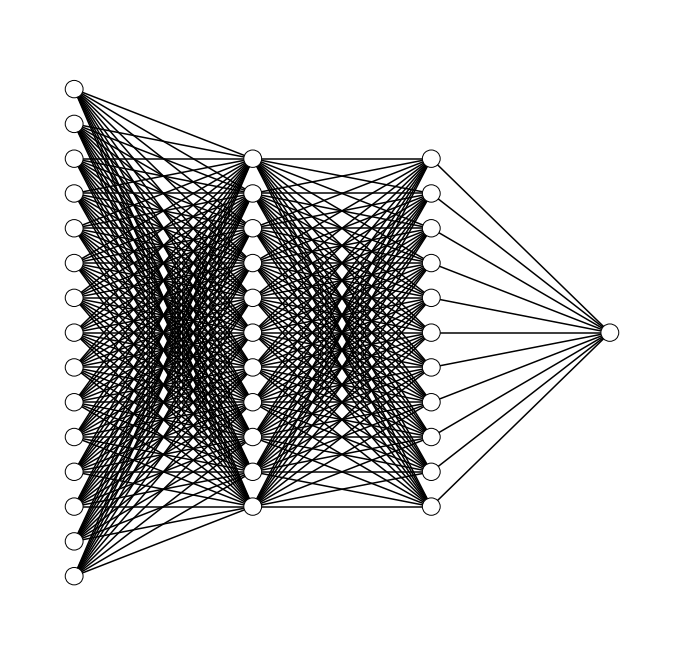

In [12]:
# to draw the neural network in matplotlib

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [15,  11, 11 , 1])

In [13]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()

Using TensorFlow backend.


In [14]:
# # Hidden layer 1
classifier.add(Dense(activation='relu', units=9,
                     kernel_initializer='uniform', input_dim=13))

In [15]:
# # # Hidden layer 2
classifier.add(Dense(activation='relu', units=9, kernel_initializer='uniform'))

In [16]:
# the output layer
# if dealing with several categories, will need multiple output neurons, and activation function would be softmax
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform")) 

# for getting the probabilistic o/p use sigmoid 

In [17]:
# Compiling the ANN
# adam is stochastic gradient descent algorithm
# use logarithmic loss function with sigmoid function (binary_crossentropy with 1 category)
# metric expect analysing parameters in a list, e.g. accuract

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
classifier.fit(x=X_train, 
               y=y_train, 
               epochs=50,
           batch_size=10)

Train on 5118 samples
Epoch 1/50
5118/5118 [==============================] - 4s 840us/sample - loss: 0.5754 - accuracy: 0.7352
Epoch 2/50
5118/5118 [==============================] - 3s 501us/sample - loss: 0.4741 - accuracy: 0.8091
Epoch 3/50
5118/5118 [==============================] - 3s 492us/sample - loss: 0.4432 - accuracy: 0.8142
Epoch 4/50
5118/5118 [==============================] - 3s 676us/sample - loss: 0.4261 - accuracy: 0.8200
Epoch 5/50
5118/5118 [==============================] - 3s 564us/sample - loss: 0.4164 - accuracy: 0.8189
Epoch 6/50
5118/5118 [==============================] - 3s 523us/sample - loss: 0.4084 - accuracy: 0.8226
Epoch 7/50
5118/5118 [==============================] - 3s 559us/sample - loss: 0.4044 - accuracy: 0.8242
Epoch 8/50
5118/5118 [==============================] - 3s 513us/sample - loss: 0.4026 - accuracy: 0.8204
Epoch 9/50
5118/5118 [==============================] - 3s 512us/sample - loss: 0.3990 - accuracy: 0.8243
Epoch 10/50
5118/5118 [=

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [20]:
y_pred

array([[3.1311533e-01],
       [5.1202995e-01],
       [1.8277917e-05],
       ...,
       [3.9631309e-04],
       [7.8738058e-01],
       [8.9352840e-01]], dtype=float32)

In [21]:
y_pred = (y_pred > 0.5)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[492, 123],
       [ 76, 589]], dtype=int64)

In [23]:
result = classifier.evaluate(X_test,  y_test, verbose=2)

dict(zip(classifier.metrics_names, result))  # zip pairs 1-1, 2-2, 3-3

1280/1280 - 0s - loss: 0.3608 - accuracy: 0.8445


{'loss': 0.36084171682596206, 'accuracy': 0.84453124}

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [25]:
# to install tekore, a spotify python lib 

#!pip install tekore

In [39]:
# add client id, client_secret to get token id

import tekore as tk

client_id = '723c44fb374043889a3580352e5e1b0a'
client_secret = 'ccccdd229b3e4cb3b70dcaf1f359403a'

app_token = tk.request_client_token(client_id, client_secret)

In [72]:
# use the tokend to access the api 
spotify = tk.Spotify(app_token)
 
#search = input()
#tracks, = spotify.search(search, types=('track', ), limit=1)
#track = tracks.items[0]

#takes the keyboard input 
print("Enter the song name")
s2 =input() 

#searches songs based on name and artist 
artists, = spotify.search(s2, limit=1)

#gives the output 
a = artists

# look into the api to get the required info 
an = a.items[0].artists[0].name   # artist name
  
sn = a.items[0].name # song name
idx = a.items[0].id # song id
print(sn,' - ', an)  

l = spotify.track_audio_features(idx)  # gives the songs features based on song id 

Enter the song name
dont call me angel
Don’t Call Me Angel (Charlie’s Angels) (with Miley Cyrus & Lana Del Rey)  -  Ariana Grande


In [73]:
# for a single new data predict the outcome 
new_prediction = classifier.predict(sc.transform(np.array([[l.danceability,l.energy,l.key,l.loudness,l.mode,l.speechiness,l.acousticness,l.instrumentalness,l.liveness,
      l.valence,l.tempo,l.duration_ms,l.time_signature]])))
new_prediction

p =float(new_prediction[0]*100) 
print(p,'%')
 
#print('Song :', track.name)
print(sn,' - ', an)

88.36515808105469 %
Don’t Call Me Angel (Charlie’s Angels) (with Miley Cyrus & Lana Del Rey)  -  Ariana Grande


In [29]:
# # creating a list of values need to feed into the nn
# l2 = [l.danceability,l.energy,l.key,l.loudness,l.mode,l.speechiness,l.acousticness,l.instrumentalness,l.liveness,
#       l.valence,l.tempo,l.duration_ms,l.time_signature]
# print(l2)    

# l2 =np.reshape(l2, (-1,1))

# sc = StandardScaler()
# le = sc.fit_transform(l2)
 
# l3 = le.T
# l3

# standard scalar normalizes the data based on columns, so replacing a data in X with the new data and normalizing it.
# X[3200] = l2
# X[3200] 

# sc = StandardScaler()
# prd = sc.fit_transform(X)
 
# l2 =np.reshape(prd[3200] ,(-1,1))
 
# l3=l2.T
# l3

# yy = classifier.predict(l3)
# # y = np.round(y)
# p =float(yy[0]*100) 
# print(p,'%')
 
# #print('Song :', track.name)
# print(sn,' - ', an)